# Bank Churn Prediction

## Objective
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

## Context
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Data Description
The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project site: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling


## Data Dictionary
- RowNumber: Row number.
- CustomerId: Unique identification key for different customers.
- Surname: Surname of the customer
- Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
- Geography: The country to which the customer belongs.
- Gender: The gender of the customer.
- Age: Age of the customer.
- Tenure: The period of time a customer has been associated with the bank.
- Balance: The account balance (the amount of money deposited in the bank account) of the customer.
- NumOfProducts: How many accounts, bank account affiliated products the person has.
- HasCrCard: Does the customer have a credit card through the bank?
- IsActiveMember: Subjective, but for the concept
- EstimatedSalary: Estimated salary of the customer.
- Exited: Did they leave the bank after all?

## Points Distribution
The points distribution for this case is as follows:

1. Read the dataset
2. Drop the columns which are unique for all users like IDs (5 points)
3. Perform bivariate analysis and give your insights from the same (5 points) 
4. Distinguish the feature and target set and divide the data set into training and test sets (5 points)
5. Normalize the train and test data (10points)
6. Initialize & build the model. Identify the points of improvement and implement the same. (20)
7. Predict the results using 0.5 as a threshold (10points)
8. Print the Accuracy score and confusion matrix (5 points)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline

In [2]:
df = pd.read_csv('bank.csv')
# df.head()

In [3]:
# df.shape

### Insights
- 14 columns
- 10,000 rows
- rather large dataset, which is good for DNN
- however, 3 columns - RowNumber, CustomerId, Surname - are used to ID the customer in some form or fashion and will not be needed
- "Exited" is the target 
variable, and since it is binary, this will be a classification problem

In [4]:
# drop RowNumber, CustomerId, Surname
df.drop(df.iloc[:, 0:3], inplace = True, axis = 1)
# df.head()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
MaxThershold = df['EstimatedSalary'].quantile(0.999)
MaxThershold

199775.69996000003

In [7]:
MinThershold = df['EstimatedSalary'].quantile(0.015)
MinThershold

2920.6087

In [8]:
df = df[(df.EstimatedSalary < MaxThershold) & (df.EstimatedSalary > MinThershold)]
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
# df01 = df[(df.EstimatedSalary < MaxThershold) & (df.EstimatedSalary > MinThershold)]
# df01.head()

In [10]:
MaxThershold = df.Balance.quantile(0.999)
MaxThershold

212375.03934000072

In [11]:
MinThershold = df.Balance.quantile(0.370)
MinThershold

52909.458799999964

In [12]:
df = df[(df.Balance < MaxThershold) & (df.Balance > MinThershold)]
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
...,...,...,...,...,...,...,...,...,...,...,...
9991,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9993,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [13]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [14]:
# df.shape

In [15]:
# df.info()

In [16]:
# df.describe()

### Column Insights
- CreditScore
    - mean < median
    - ranges from 350 to 850, with the majority of data points within the first quartile 
    - negative skewness
- Age
    - mean > median
    - range: 18-92
    - third quartile: 44
    - positive skewness
- Tenure
    - mean = median
    - range: 0-10
    - first quartile: 3
    - second quartile: 5
    - third quartile: 7
    - symmetrical distribution
- Balance
    - mean < mode
    - significant range: \\$0 to \\$250,898 (side note: U.S. financial institutions are only FDIC-insured up to 250,000 so this customer should rethink their balance)
    - minimum = first quartile! meaning a significant number of balances are \\$0
- NumOfProducts
    - mean < median
    - range: 1-4
    - minimum = first quartile
    - most customers only have 1 product
    - positive skewness
- EstimatedSalary
    - mean = median
    - range: 11-200,000
    - symmetrical distribution

In [17]:
# df.CreditScore.hist(bins=100)

In [18]:
# df.Age.hist(bins=100)

In [19]:
# df.Tenure.hist(bins=10)

In [20]:
# df.Balance.hist(bins=10)

In [21]:
# df.NumOfProducts.hist(bins=4)

In [22]:
# df.EstimatedSalary.hist(bins=100)

    
### Overall Insights
    - Most customers have a good credit score, they're younger, most have a $0 balance, most have only 1 account, and they have a wide range of salaries (customers from nearly every income bracket). 

In [23]:
# sns.pairplot(df, diag_kind='kde')

In [24]:
# sns.heatmap(df.corr())

### Insights
- IsActiveMember has the lowest correlation with Exited
- Age has the highest

In [25]:
# df = df.drop(['IsActiveMember'], axis=1)
# df.head()

In [26]:
# store only continuous variables + target variable (Exited) into dataframe for analysis
# df_plot = df.drop(['Geography', 'Gender', 'HasCrCard'], axis = 1)
# df_plot.head()

In [27]:
# for col in df_plot.columns:
#     df_plot.plot.scatter(x=col, y='Exited')

### Insights
- Assumptions: regarding Exited, 1 = yes = "customer did leave" and 0 = no = "customer did not leave".
- Customers with a higher balance and a higher number of accounts tended to leave.
- This intially suggests that the bank does not offer services that meet the demands of customers with more money.
- Furthermore, I could assume that this bank does not offer investment services. 

In [28]:
# df['Geography'].unique()

In [29]:
# one-hot encoding of Geography(categorical variable)
df = pd.get_dummies(df, columns=['Geography'])
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645,Male,44,8,113755.78,2,1,0,149756.71,1,0,0,1
7,376,Female,29,4,115046.74,4,1,0,119346.88,1,0,1,0


In [30]:
# df['Gender'].unique()

In [31]:
# convert gender into binary instead of one-hot encoding
gender = {'Male': 0,'Female': 1}
df.Gender = [gender[item] for item in df.Gender]
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645,0,44,8,113755.78,2,1,0,149756.71,1,0,0,1
7,376,1,29,4,115046.74,4,1,0,119346.88,1,0,1,0


In [32]:
# scale continuous variables
cont_var = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
scaler_minmax = MinMaxScaler()
df[cont_var] = scaler_minmax.fit_transform(df[cont_var])
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
1,0.516,1,0.310811,1,0.193311,1,0,1,0.556900,0,0,0,1
2,0.304,1,0.324324,8,0.669473,3,1,0,0.563957,1,1,0,0
4,1.000,1,0.337838,2,0.455099,1,1,1,0.386920,0,0,0,1
5,0.590,0,0.351351,8,0.381307,2,1,0,0.745960,1,0,0,1
7,0.052,1,0.148649,4,0.389411,4,1,0,0.591468,1,0,1,0


In [33]:
# df['Gender'].unique()

In [34]:
df.dtypes

CreditScore          float64
Gender                 int64
Age                  float64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [35]:
for col in df.columns:
#     print(df[col].dtype=='uint8')
    if df[col].dtype=='uint8':
        df[col] = df[col].astype('int64')

In [36]:
df.dtypes

CreditScore          float64
Gender                 int64
Age                  float64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int64
Geography_Germany      int64
Geography_Spain        int64
dtype: object

In [37]:
# categorical_cols = ['Gender', 'NumOfProducts', 'HasCrCard']
# for col in categorical_cols:
#     df[col] = df[col].astype('int64')

In [38]:
df.dtypes

CreditScore          float64
Gender                 int64
Age                  float64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int64
Geography_Germany      int64
Geography_Spain        int64
dtype: object

In [39]:
df.shape

(6189, 13)

In [30]:
MaxThershold = df['EstimatedSalary'].quantile(0.999)
MaxThershold

199775.69996000003

In [31]:
MinThershold = df['EstimatedSalary'].quantile(0.015)
MinThershold

2920.6087

In [32]:
df01 = df[(df.EstimatedSalary < MaxThershold) & (df.EstimatedSalary > MinThershold)]
df01.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,79084.10,0,0,0,1


In [33]:
MaxThershold = df01.Balance.quantile(0.999)
MaxThershold

212375.03934000072

In [34]:
MinThershold = df01.Balance.quantile(0.370)
MinThershold

52909.458799999964

In [35]:
df02 = df01[(df01.Balance < MaxThershold) & (df01.Balance > MinThershold)]
df02.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
1,608,0,41,1,83807.86,1,0,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,113931.57,1,1,0,0
4,850,0,43,2,125510.82,1,1,79084.10,0,0,0,1
5,645,1,44,8,113755.78,2,1,149756.71,1,0,0,1
7,376,0,29,4,115046.74,4,1,119346.88,1,0,1,0


In [36]:
df02.shape

(6189, 12)

# NN model

In [40]:
# split between dependent and independent variables
X = df.drop('Exited', axis=1)
y = df['Exited']

In [41]:
# split between training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

In [42]:
# # standardize data
# scaler_std = StandardScaler()
# X_train= scaler_std.fit_transform(X_train)
# X_test = scaler_std.fit_transform(X_test)

In [43]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4951, 12), (1238, 12), (4951,), (1238,))

In [44]:
# initialize the constructor
model = Sequential()

# define model architecture, i.e., define neurons and hidden layers 

# first hidden layer
# model.add(Dense(48, activation='sigmoid'))

# # second hidden layer
# model.add(Dense(24, activation='sigmoid'))

# model.add(Dense(12, activation='sigmoid'))

# model.add(Flatten(input_shape=(10,)))
# model.add(Dense(100,activation='relu'))
# model.add(Dense(1))

model.add(Dense(12, input_shape=(12,), activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1,activation='sigmoid' ))

# output layer with one neuron since classification 
# no activation (no softmax) since it is not regression
# model.add(Dense(1))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

model.fit(X_train, y_train, epochs=200, verbose=False)
# model.fit(X_train,y_train,batch_size=64,validation_split=0.1,epochs=100)

In [45]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.852
Loss: 0.376


In [46]:
y_predict = model.predict(X_test)

In [47]:
y_predict = (y_predict > 0.5)
y_predict

array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

Text(0.5, 51.0, 'Observed')

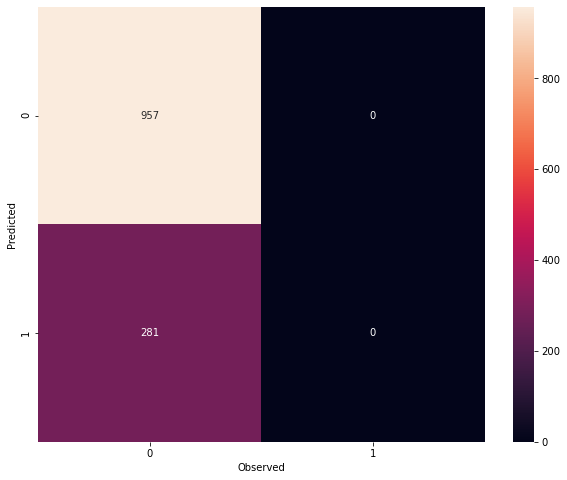

In [48]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
labels = ['positive', 'negative']
cm = metrics.confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Predicted')
plt.xlabel('Observed')

In [49]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       957
           1       0.00      0.00      0.00       281

    accuracy                           0.77      1238
   macro avg       0.39      0.50      0.44      1238
weighted avg       0.60      0.77      0.67      1238



/Users/ivansaucedo/opt/anaconda3/envs/aiml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ivansaucedo/opt/anaconda3/envs/aiml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ivansaucedo/opt/anaconda3/envs/aiml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif